# Background

The following notebook presents the steps involved in and the thought process we used in predicting house prices based on multiple features using regression analysis. We were presented with a dataset preprocessed for instructional purposes and derived from the dataset provided in the former Kaggle competition to predict housing sale price using regression.

King County is home to the largest and fifth largest city in Washington State, namely Seattle and Bellevue, which in conjunction with the third largest city Tacoma forms the Seattle metropolitan area.

If you would like to explore the original dataset on Kaggle, please follow the link below:
https://www.kaggle.com/harlfoxem/housesalesprediction/discussion/92376

We have provided the names and descriptions of the columns in the provided King County dataset:
* **id** - unique ID for a house
* **date** - Date day house was sold
* **price** - Price is prediction target
* **bedrooms** - Number of bedrooms
* **bathrooms** - Number of bathrooms
* **sqft_living** - square footage of the home
* **sqft_lot** - square footage of the lot
* **floors** - Total floors (levels) in house
* **waterfront** - Whether house has a view to a waterfront
* **view** - Number of times house has been viewed
* **condition** - How good the condition is (overall)
* **grade** - overall grade given to the housing unit, based on King County grading system
* **sqft_above** - square footage of house (apart from basement)
* **sqft_basement** - square footage of the basement
* **yr_built** - Year when house was built
* **yr_renovated** - Year when house was renovated
* **zipcode** - zip code in which house is located
* **lat** - Latitude coordinate
* **long** - Longitude coordinate
* **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
* **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors


# **Business Questions**

Our client representing a cohort of foreign investors has expressed interest in becoming involved in the Seattle area housing market.  By gaining better insight into the prediction models for housing prices, they hope to become major players in the market.  They have partnered with us to apply machine learning in enhancing the prediction of housing prices in King County.

We set out to answer a few questions for our client:

1. Do renovated properties have a higher selling price than unrenovated properties?
2. Does the number of times a property is viewed have any effect on selling price?
3. Does the grade given to the housing unit have an overall effect on the selling price?

Through the use of statistical tests during our EDA process, we will be able to provide the essential information needed for our clients in their new business venture.

# **Exploratory Data Analysis**

The following notebook presents the steps in predicting house pries based on multiple features using regression analysis. We used a dataset of house sales in King County, which includes the city of Seattle and the metropolitan area, processed for instructional purposes from the original Kaggle dataset. We will apply the techniques of exploratory data analysis (EDA) to familiarize ourselves with the dataset.

By performing an EDA, we are able to explore the relationship(s), or lack thereof, between the features and the target and amongst the feature variables themselve. We are better equipped through this process to identify features for analysis and filter out those without any correlation with our target variable. This process is also integral to identifying outliers, missing values, or anomalous values due to human error due to data visualization.

In [54]:
# import packages for data cleaning and processing  
import pandas as pd
import numpy as np
from datetime import datetime
import itertools
import geohash2
import warnings

# import visualization modules
import seaborn as sns
import matplotlib.pyplot as plt
from bokeh.plotting import figure, show, ColumnDataSource
from bokeh.io import output_notebook
from bokeh.palettes import Turbo256, Category10_10
from bokeh.transform import linear_cmap
from bokeh.models import HoverTool
warnings.filterwarnings('ignore')
%matplotlib inline
plt.style.use("fivethirtyeight")
import branca.colormap as cm
import json

# import packages for geolocation
import folium
from folium import plugins
import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon
from folium.plugins import MarkerCluster
from folium.plugins import HeatMap
from bokeh.palettes import RdYlBu11
from bokeh.models import LogColorMapper
from bokeh.io import show
from bokeh.models import (CDSView, ColorBar, ColumnDataSource, CustomJS, CustomJSFilter, GeoJSONDataSource, HoverTool, LinearColorMapper, Slider)
from bokeh.layouts import column, row, widgetbox
from bokeh.palettes import brewer
from bokeh.plotting import figure

# import packages and modules for statistical analysis
from scipy import stats
import scipy.stats as scs
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn import linear_model
from sklearn import metrics

# import modules for preprocessing
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_selection import RFE, SelectKBest, f_regression, RFECV, mutual_info_regression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, LabelBinarizer, LabelEncoder, minmax_scale
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error


# import module for object serialization
import pickle

# set display options for Pandas dataframes to allow view of a maximal number of columns and rows
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)


In [2]:
# Read CSV file into notebook
df = pd.read_csv('data/kc_house_data_train.csv', index_col=0)

In [3]:
# get dimensions of the dataframe
df.shape

(17290, 21)

In [4]:
# Display first 5 rows of dataset
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2591820310,20141006T000000,365000.0,4,2.25,2070,8893,2.0,0,0,4,8,2070,0,1986,0,98058,47.4388,-122.162,2390,7700
1,7974200820,20140821T000000,865000.0,5,3.00,2900,6730,1.0,0,0,5,8,1830,1070,1977,0,98115,47.6784,-122.285,2370,6283
2,7701450110,20140815T000000,1038000.0,4,2.50,3770,10893,2.0,0,2,3,11,3770,0,1997,0,98006,47.5646,-122.129,3710,9685
3,9522300010,20150331T000000,1490000.0,3,3.50,4560,14608,2.0,0,2,3,12,4560,0,1990,0,98034,47.6995,-122.228,4050,14226
4,9510861140,20140714T000000,711000.0,3,2.50,2550,5376,2.0,0,0,3,9,2550,0,2004,0,98052,47.6647,-122.083,2250,4050


In [5]:
# Display last 5 rows of dataset
df.tail()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
17285,627300195,20150303T000000,750000.0,5,2.50,3240,9960,1.0,0,1,3,8,2020,1220,1958,0,98008,47.5858,-122.112,2730,10400
17286,8819900270,20140520T000000,440000.0,2,1.75,1300,4000,2.0,0,0,3,7,1300,0,1948,0,98105,47.6687,-122.288,1350,4013
17287,3816300095,20140514T000000,310000.0,3,1.00,1050,9876,1.0,0,0,3,7,1050,0,1953,0,98028,47.7635,-122.262,1760,9403
17288,122069107,20141204T000000,427500.0,3,1.50,1900,43186,1.5,0,0,4,7,1300,600,1971,0,98038,47.4199,-121.990,2080,108028
17289,6703100135,20150116T000000,348000.0,3,1.50,1330,6768,1.0,0,0,4,7,1330,0,1952,0,98155,47.7366,-122.319,1320,6910


In [6]:
# Get descriptive analytics of dataset
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,1.729000e+04,1.729000e+04,17290.000000,17290.000000,17290.000000,1.729000e+04,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000
mean,4.565502e+09,5.407395e+05,3.372470,2.111943,2081.464604,1.524340e+04,1.490312,0.007981,0.238519,3.408502,7.654425,1789.306015,292.158589,1970.792019,83.806304,98078.193175,47.560058,-122.214258,1987.986698,12873.475824
std,2.874656e+09,3.733190e+05,0.939346,0.770476,920.018539,4.230462e+04,0.538909,0.088985,0.775229,0.651296,1.174718,829.265107,443.151874,29.343516,400.329376,53.607949,0.138412,0.140857,684.802635,27227.437583
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.720000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,659.000000
25%,2.114701e+09,3.210000e+05,3.000000,1.500000,1430.000000,5.081250e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1200.000000,0.000000,1951.000000,0.000000,98033.000000,47.471200,-122.329000,1490.000000,5111.250000
50%,3.903650e+09,4.500000e+05,3.000000,2.250000,1920.000000,7.642000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1974.000000,0.000000,98065.000000,47.571600,-122.230000,1840.000000,7622.500000
75%,7.301150e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.072575e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2214.500000,560.000000,1996.000000,0.000000,98118.000000,47.677900,-122.126000,2360.000000,10101.750000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,858132.000000


**Initial Observations:**

- *waterfront* is a binary discrete variable (0 = not waterfront, 1 = waterfront)
- *sqft_above* + *sqft_basement* = *sqft_living*
- *sqft_basement*, *view*, and *yr_renovated* have many zero values, potentially express them as binary variables
- the oldest home was built in 1970 and the newest in 2015

We can assign our categorical and continuous variables:

- **categorical variables:**  *floors, view, grade, zipcode, bathrooms, bedrooms, condition*
- **continuous variables:** *price, sqft_living, sqft_lot, sqft_above, sqft_basement, yr_built, yr_renovated, lat, long, sqft_living15, sqft_lot15*


In [7]:
# Look for any column types that need conversion
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

## **Initial Data Cleaning**

In [8]:
# Check for any null values in the dataset
df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [9]:
# Convert 'date' column to datetime format, rename to 'sale_date', and drop original column
df['sale_date'] = [x[:8] for x in df.date]
df.sale_date = df.sale_date.apply(lambda x: datetime.strptime(x, '%Y%m%d'))
df.drop(columns='date', inplace=True)
df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sale_date
0,2591820310,365000.0,4,2.25,2070,8893,2.0,0,0,4,8,2070,0,1986,0,98058,47.4388,-122.162,2390,7700,2014-10-06
1,7974200820,865000.0,5,3.00,2900,6730,1.0,0,0,5,8,1830,1070,1977,0,98115,47.6784,-122.285,2370,6283,2014-08-21
2,7701450110,1038000.0,4,2.50,3770,10893,2.0,0,2,3,11,3770,0,1997,0,98006,47.5646,-122.129,3710,9685,2014-08-15
3,9522300010,1490000.0,3,3.50,4560,14608,2.0,0,2,3,12,4560,0,1990,0,98034,47.6995,-122.228,4050,14226,2015-03-31
4,9510861140,711000.0,3,2.50,2550,5376,2.0,0,0,3,9,2550,0,2004,0,98052,47.6647,-122.083,2250,4050,2014-07-14


In [10]:
geodata = gpd.read_file("mapping/Zipcodes_for_King_County_and_Surrounding_Area___zipcode_area.shp")
geodata.head()

,OBJECTID,ZIP,ZIPCODE,COUNTY,ZIP_TYPE,Shape_Leng,Shape_Area,geometry
0,1,98031,98031,033,Standard,117508.232813,2.280129e+08,"POLYGON ((-122.21842 47.43750, -122.21935 47.4..."
1,2,98032,98032,033,Standard,166737.665152,4.826754e+08,"MULTIPOLYGON (((-122.24187 47.44122, -122.2411..."
2,3,98030,98030,033,Standard,94409.538568,2.000954e+08,"POLYGON ((-122.21006 47.38692, -122.21007 47.3..."
3,4,98029,98029,033,Standard,111093.715481,2.774247e+08,"POLYGON ((-121.97642 47.58430, -121.97645 47.5..."
4,5,98028,98028,033,Standard,71488.230747,1.996531e+08,"POLYGON ((-122.22788 47.76909, -122.22790 47.7..."


In [15]:
zip_df = df.groupby('zipcode').agg(np.mean)
zip_df.reset_index(inplace=True)
zip_df.head()

,zipcode,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,98001,4.626220e+09,2.819988e+05,3.387324,1.990317,1902.718310,15564.359155,1.396127,0.000000,0.109155,3.323944,7.302817,1705.077465,197.640845,1979.904930,41.869718,47.309579,-122.270891,1820.056338,11337.359155
1,98002,4.997224e+09,2.322865e+05,3.305732,1.828025,1618.038217,7536.222930,1.318471,0.000000,0.012739,3.738854,6.668790,1518.700637,99.337580,1966.337580,75.910828,47.307609,-122.213299,1460.649682,7758.611465
2,98003,4.631569e+09,2.907627e+05,3.375000,2.066964,1939.125000,10777.062500,1.310268,0.000000,0.183036,3.361607,7.526786,1667.732143,271.392857,1977.125000,26.700893,47.316625,-122.309804,1864.035714,9717.857143
3,98004,4.291230e+09,1.396883e+06,3.856540,2.527426,2969.409283,13679.042194,1.432489,0.004219,0.312236,3.502110,8.776371,2458.143460,511.265823,1971.810127,202.594937,47.615932,-122.205561,2742.236287,13220.194093
4,98005,5.096151e+09,8.088476e+05,3.835714,2.417857,2679.235714,19172.150000,1.264286,0.000000,0.114286,3.700000,8.500000,2161.807143,517.428571,1969.492857,57.157143,47.611205,-122.167536,2559.578571,18203.107143


In [16]:
df['count'] = 1
count_zip = df.groupby('zipcode').sum()
count_zip.reset_index(inplace=True)
count_zip = count_zip[['zipcode', 'count']]
df.drop(['count'], axis = 1, inplace=True)
count_zip.head()

,zipcode,count
0,98001,284
1,98002,157
2,98003,224
3,98004,237
4,98005,140


In [17]:
zip_df = pd.merge(zip_df, count_zip, how='left', on=['zipcode'])
zip_df.head()

,zipcode,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,count
0,98001,4.626220e+09,2.819988e+05,3.387324,1.990317,1902.718310,15564.359155,1.396127,0.000000,0.109155,3.323944,7.302817,1705.077465,197.640845,1979.904930,41.869718,47.309579,-122.270891,1820.056338,11337.359155,284
1,98002,4.997224e+09,2.322865e+05,3.305732,1.828025,1618.038217,7536.222930,1.318471,0.000000,0.012739,3.738854,6.668790,1518.700637,99.337580,1966.337580,75.910828,47.307609,-122.213299,1460.649682,7758.611465,157
2,98003,4.631569e+09,2.907627e+05,3.375000,2.066964,1939.125000,10777.062500,1.310268,0.000000,0.183036,3.361607,7.526786,1667.732143,271.392857,1977.125000,26.700893,47.316625,-122.309804,1864.035714,9717.857143,224
3,98004,4.291230e+09,1.396883e+06,3.856540,2.527426,2969.409283,13679.042194,1.432489,0.004219,0.312236,3.502110,8.776371,2458.143460,511.265823,1971.810127,202.594937,47.615932,-122.205561,2742.236287,13220.194093,237
4,98005,5.096151e+09,8.088476e+05,3.835714,2.417857,2679.235714,19172.150000,1.264286,0.000000,0.114286,3.700000,8.500000,2161.807143,517.428571,1969.492857,57.157143,47.611205,-122.167536,2559.578571,18203.107143,140


In [18]:
# cmap = cm.LinearColormap(colors=['blue', 'yellow', 'red'], vmin=100000, vmax=1500000)
# m = folium.Map(location=[df.lat.mean(), df.long.mean()], zoom_start=10, tiles='stamenterrain')
# for i in range(len(df)):
#     folium.Circle(
#         location=[df.iloc[i]['lat'], df.iloc[i]['long']],
#         radius=10,
#         fill=True,
#         color=cmap(df.iloc[i]['price']),
#         fill_opacity=0.2
#     ).add_to(m)
# m.add_child(cmap)
# m.save('price_cmap.html')
# m

<img src="images/folium_circles.png">

In [19]:
# df['zipcode'] = df['zipcode'].astype('str')
# boundary_file = "mapping/Zipcodes_for_King_County_and_Surrounding_Area___zipcode_area.geojson"
# with open(boundary_file, 'r') as f:
#     zipcode_boundary = json.load(f)
# m = folium.Map(location=[df.lat.mean(), df.long.mean()], zoom_start=10, tiles='openstreetmap')
# zipcode_data = df.groupby('zipcode').aggregate(np.mean)
# zipcode_data.reset_index(inplace = True) 
# bins = list(zipcode_data['price'].quantile([0, 0.2, 0.4, 0.6, 0.8, 1]))
# folium.Choropleth(
#     geo_data=zipcode_boundary,
#     name='choropleth',
#     data=zipcode_data,
#     columns=['zipcode', 'price'],
#     key_on='feature.properties.ZIPCODE',
#     fill_color='Spectral',
#     fill_opacity=0.6,
#     nan_fill_opacity=0,
#     line_opacity=1,
#     bins=bins,
#     legend_name='Mean Price'
# ).add_to(m)
# m.save('zip_choropleth.html')
# m

<img src="images/folium_choropleth.png">

Since the data was preprocessed, this steps are more pro forma.  We did not expect to produce any duplicate or missing values from this dataset, as would be expected from more raw data, i.e. directly from Kaggle.  These would be necessary steps in the preprocessing stage of the data.

In [20]:
# Put features into categorical and continuous subsets
feat_cat = df[['view', 'condition', 'grade', 'waterfront', 'floors', 'bedrooms', 'bathrooms', 'zipcode']]
feat_con = df[['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'sqft_living15', 'sqft_lot15', 'yr_built', 'yr_renovated', 'lat', 'long']]

In [21]:
# Get indices of the subsetted columns to prepare for Seaborn visualizations
col_con = feat_con.columns
col_cat = feat_cat.columns

## Target Variable Visualization

In [22]:
# fig, ax = plt.subplots(figsize=(12, 4))
# ax = sns.boxplot(df.price)
# plt.savefig("df_target_2.png")

<img src="images/df_target_2.png">

**Observations:**

- We could use this boxplot to identify outliers, but there are potentially different ways we could approach outliers for our target variable.  But this is just to get a lay of the land.

## **Continuous Variable Visualizations**

In [23]:
## Display distribution plots of continuous variables using FacetGrid and distplot

# con_1 = pd.melt(df, value_vars = col_con)
# g = sns.FacetGrid(con_1, col='variable', col_wrap=3, sharex=False, sharey=False, height=4)
# g = g.map(sns.distplot, 'value', color='r')
# g.set_xticklabels(rotation=45)
# plt.savefig("images/df_distplot.png")


<img src="images/df_distplot.png">

**Observations:**

- `sqft_living`, `sqft_above`, and `sqft_living15` are skewed to the right, potentially use log transformation with skewed data to conform to normality
- `sqft_lot`, `sqft_lot15`, `sqft_basement`, and `yr_renovated` have a lot of zero values, maybe create a discrete binary variable for some of them

In [24]:
# Create scatterplots with regression line with regplot() of continuous variables

# con_2 = pd.melt(df, id_vars='price', value_vars=col_con)
# g = sns.FacetGrid(con_2, col='variable', col_wrap=3, sharex=False, sharey=False, height=4)
# g = g.map(sns.regplot, 'value', 'price', color='darkorange')
# g.set_xticklabels(rotation=45)
# plt.savefig('images/df_scatter.png')


<img src="images/df_regplot.png">

**Observations:**

- in the case of `yr_renovated`, with such disparate values between no renovations as 0 values and the years having values around 2000, best to consider this as a discrete variable rather than continuous
- `sqft_living` and `sqft_above` show the strongest correlation with `price`
- scatterplots allow you to identify outliers
- hard to see relationship of `lat`, `long`, and `yr_built` to `price`


## Categorical Variable Visualizations

In [25]:
# Use bar graphs of the distribution of data for categorical variables

# cat_1 = pd.melt(df, value_vars=col_cat)
# g = sns.FacetGrid(cat_1, col='variable', col_wrap=3, sharex=False, sharey=False, height=4)
# g = g.map(sns.countplot, 'value', color='g')
# g.set_xticklabels(rotation=90)
# plt.savefig("images/df_countplot.png")

<img src="images/df_countplot.png">

**Observations:**

- large number of zero values for `waterfont` and `view`
- `bedrooms` and `bathrooms` have right-skewed data

In [26]:
# Create scatterplots for categorical variables to observe any relationships

# cat_2 = pd.melt(df,id_vars='price', value_vars=col_cat)
# g = sns.FacetGrid(cat_2, col='variable', col_wrap=3, sharex=False, sharey=False, height=4)
# g = g.map(sns.regplot, 'value', 'price', color='dodgerblue')
# g.set_xticklabels(rotation=90)
# plt.savefig("images/df_regplot.png")


<img src="images/df_regplot.png">

**Observations:**

- stronger relationship: `bedrooms` vs. `price`, `grade` vs. `price`
- `waterfront` and `view` have correlation with `price`
- little relationship between `zipcode`, `condition`, and `floor`

In [27]:
# Display boxplots of categorical variables to observe any trends in the mean values of each category

# cat_3 = pd.melt(df, id_vars='price', value_vars=col_cat)
# g = sns.FacetGrid(cat_3, col='variable', col_wrap=3, sharex=False, sharey=False, height=4)
# g = g.map(sns.boxplot, 'value', 'price', color='mediumslateblue')
# g.set_xticklabels(rotation=90)
# plt.savefig("images/df_boxplot.png")

<img src="images/df_boxplot.png">

**Observations:**

- 33 bedrooms is an outlier, potentially replace with 3 bedrooms
- strong exponential relationship in the mean values for number of bathrooms and grade
- little correlation with mean views, perhaps express as binary variable
- potentially replace outliers with the mean for grade and bathrooms

In [28]:
# df_zipcode = df.groupby(['zipcode']).price.median().sort_values(ascending=False)
# plt.figure(figsize=(20,10))
# plt.ylabel('median price')
# df_zipcode.plot(kind='bar')
# plt.savefig("images/zipcode.png")

<img src="images/zipcode.png">

## Looking at Correlations

In [30]:
# Correlation Matrix between all variables

# corr_matrix = df.corr()
# plt.figure(figsize=(16,12))
# sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linecolor='black', linewidths=1.0, xticklabels=True, yticklabels=True)
# plt.show()


<img src="images/df_corr.png">

**Final Observations from EDA:**

1. Price has a strong correlation with `sqft_living` and `grade`
2. Price has medium correlation with `bedrooms`, `sqft_above`, `sqft_living15`
3. Price has low correlation with `bedrooms`, `floors`, `sqft_basement`, `latitude`
4. Price has no significant relationship with `sqft_lot`, `yr_built`, `long`, `sqft_lot15`

This will help in guiding our decision for initial feature selection in developing different models.


## **Data Cleaning**

**As data scientists, we undergo the different facets of the data cleaning process to ensure that our "dirty" data does not lead to any false conclusions. To ensure the validity, completeness, and consistency of the data, we make any necessary type conversions, remove any duplicate values and outliers, impute in any missing or anomalous values, perform any scaling or transformations to reduce skewness.**

In [29]:
# Reset view options
pd.set_option('display.max_rows', 20)

In [30]:
# Drop 'id' column and check dataframe
df.drop(['id'], inplace=True, axis=1)
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sale_date
0,365000.0,4,2.25,2070,8893,2.0,0,0,4,8,2070,0,1986,0,98058,47.4388,-122.162,2390,7700,2014-10-06
1,865000.0,5,3.00,2900,6730,1.0,0,0,5,8,1830,1070,1977,0,98115,47.6784,-122.285,2370,6283,2014-08-21
2,1038000.0,4,2.50,3770,10893,2.0,0,2,3,11,3770,0,1997,0,98006,47.5646,-122.129,3710,9685,2014-08-15
3,1490000.0,3,3.50,4560,14608,2.0,0,2,3,12,4560,0,1990,0,98034,47.6995,-122.228,4050,14226,2015-03-31
4,711000.0,3,2.50,2550,5376,2.0,0,0,3,9,2550,0,2004,0,98052,47.6647,-122.083,2250,4050,2014-07-14


**The `id` column is used to uniquely identify each property, but can be used in regression analysis.**

In [31]:
# Replace anomalous bedroom values and check values in column
df.replace({'bedrooms': {33: 3}}, inplace=True)
df.bedrooms.value_counts()

3     7865
4     5488
2     2204
5     1283
6      229
1      160
7       30
0       12
8       10
9        5
10       3
11       1
Name: bedrooms, dtype: int64

**Upon investigation, it was highly likely that the value was recorded incorrectly and would seem more in alignment with properties with 3 bedrooms rather than 33 bedrooms, which itself is extremely anomalous.**

In [32]:
df[df.bathrooms==0].sort_values('price', ascending=False)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sale_date
9286,1295650.0,0,0.0,4810,28008,2.0,0,0,3,12,4810,0,1990,0,98053,47.6642,-122.069,4740,35061,2014-06-24
1120,1095000.0,0,0.0,3064,4764,3.5,0,2,3,7,3064,0,1990,0,98102,47.6362,-122.322,2360,4000,2014-06-12
12982,484000.0,1,0.0,690,23244,1.0,0,0,4,7,690,0,1948,0,98053,47.6429,-121.955,1690,19290,2014-09-18
5424,380000.0,0,0.0,1470,979,3.0,0,2,3,8,1470,0,2006,0,98133,47.7145,-122.356,1470,1399,2015-02-05
483,355000.0,0,0.0,2460,8049,2.0,0,0,3,8,2460,0,1990,0,98031,47.4095,-122.168,2520,8050,2015-04-29
3032,235000.0,0,0.0,1470,4800,2.0,0,0,3,7,1470,0,1996,0,98065,47.5265,-121.828,1060,7200,2014-12-23
10067,142000.0,0,0.0,290,20875,1.0,0,0,1,1,290,0,1963,0,98024,47.5308,-121.888,1620,22850,2014-09-26
9060,75000.0,1,0.0,670,43377,1.0,0,0,3,3,670,0,1966,0,98022,47.2638,-121.906,1160,42882,2015-02-17


**Since we cannot remove any data values from the dataset, I would replace the zero bathroom values with 0.25 since that is the bare minimum for any property.  While properties can have zero bedrooms like studios, but properties must have a bathroom.  Since we have already demonstrated that it has a strong correlation with price, we need to impute some value for the zero values.  What constitutes a quarter bathroom is a bathroom with either a sink, a shower, toilet, or bathtub.  For example, a hallway shower or fresh-up room with single sink would be a 0.25 bathroom.**

In [33]:
df.replace({'bathrooms': {0: 0.25}}, inplace=True)
df.bathrooms.value_counts()

2.50    4322
1.00    3100
1.75    2431
2.25    1666
2.00    1549
        ... 
6.75       2
6.25       2
7.50       1
6.50       1
7.75       1
Name: bathrooms, Length: 30, dtype: int64

In [34]:
df[df.grade==11].sort_values('price', ascending=False)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sale_date
6903,7062500.0,5,4.50,10040,37325,2.0,1,2,3,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449,2014-06-11
3903,3850000.0,4,4.25,5770,21300,2.0,1,4,4,11,5770,0,1980,0,98040,47.5850,-122.222,4620,22748,2014-11-14
260,3650000.0,6,4.75,5480,19401,1.5,1,4,5,11,3910,1570,1936,0,98105,47.6515,-122.277,3510,15810,2015-04-21
1020,3640900.0,4,3.25,4830,22257,2.0,1,4,4,11,4830,0,1990,0,98039,47.6409,-122.241,3820,25582,2014-09-11
10286,3418800.0,5,5.00,5450,20412,2.0,0,0,3,11,5450,0,2014,0,98039,47.6209,-122.237,3160,17825,2014-10-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8344,635000.0,5,3.50,4150,13232,2.0,0,0,3,11,4150,0,2006,0,98003,47.3417,-122.182,3840,15121,2015-02-06
13984,633000.0,5,2.75,3630,30570,2.0,0,0,3,11,3630,0,2000,0,98058,47.4243,-122.097,3620,41965,2014-12-19
2905,575000.0,4,2.50,4620,20793,2.0,0,0,4,11,4620,0,1991,0,98023,47.2929,-122.342,3640,20793,2014-06-24
5668,556000.0,5,2.50,3840,16905,2.0,0,0,3,11,3840,0,1991,0,98023,47.2996,-122.342,3270,12133,2014-05-23


**If we investigate this top outlier that we identified through our data visualization, it immediately becomes apparent that the increase in `price` can be explained by the combination of any of the following: increase in `sqft_living`, `sqft_lot`, and `sqft_basement`, and the recent renovation.  Based on this information, it would not be considered an outlier based on that level of `grade`.**

In [35]:
df[df.bathrooms==4.5].sort_values('price', ascending=False)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sale_date
6903,7062500.0,5,4.5,10040,37325,2.0,1,2,3,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449,2014-06-11
7823,3567000.0,5,4.5,4850,10584,2.0,1,4,3,10,3540,1310,2007,0,98008,47.5943,-122.110,3470,18270,2015-01-07
5293,3200000.0,7,4.5,6210,8856,2.5,0,2,5,11,4760,1450,1910,0,98109,47.6307,-122.354,2940,5400,2014-05-07
16000,2945000.0,5,4.5,4340,5722,3.0,0,4,3,10,4340,0,2010,0,98107,47.6715,-122.406,1770,5250,2015-03-04
3181,2600000.0,4,4.5,5270,12195,2.0,1,4,3,11,3400,1870,1979,0,98027,47.5696,-122.090,3390,9905,2014-12-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1835,482500.0,6,4.5,2940,7500,1.5,0,0,4,8,2940,0,1966,0,98034,47.7208,-122.182,2010,7500,2014-09-05
14681,460000.0,5,4.5,3100,7260,2.0,0,0,3,8,3100,0,1963,2000,98059,47.5004,-122.162,1650,7700,2015-02-25
13472,389000.0,6,4.5,3560,14010,2.0,0,0,3,7,3560,0,1989,0,98002,47.3244,-122.217,1710,11116,2015-05-06
9118,350000.0,6,4.5,3500,8504,2.0,0,0,3,7,3500,0,1980,0,98155,47.7351,-122.295,1550,8460,2014-09-17


**If we pick another outlier to explore like the apparent high housing price value in the category of 4.5 bathrooms, once again, there is a substantive increase in `sqft_living` and `sqft_lot`, plus `renovated`. Based on analyzing these two values, I have decided not to change any apparent outliers.**

# Feature Engineering

The goal of feature engineering is to prepare the data for the machine learning algorithms and to improve the performance of the models. The different techniques involved include creating dummy variables for our categorical variables, perform any transformations or scaling, binning, or any new features based on your EDA analysis.

Log transformations consist of taking the log of each observation, where the back transformation is raise 10 or 3 to the power of the number. In the instance where different indepedent factors relate in the following fashion, (factor)*(factor)*(factor)*(factor), i.e. a multiplicative process, the function is log-normal. In biology, size data would be representative of such a dataset, i.e. height of trees.  It is used to handle skewed data in creating a more normal distribution, as well as decreasing the effect of outliers.

Square root transformations consists of taking the sqaure root of each observation, where the back transformation is to square the number.  Count data, like bacteria in a petri dish or mutations in a population, can be transformed for a more normal distributions.  Reciprocal transformations.... 

Scaling techniques normalize the scale of various indepedent variables, which include mean normalization, standardization, robust scaling (median and IQR), min-max scaling, for certain algorithms that are particularly sensitive to feature magnitude. Variables with a greater magnitude often dominate over those with a smaller magnitude range, and the scale directly influences the regression coefficient.

In [36]:
# Create new feature to incorporate built and renovation year
df['sale_age'] = df.sale_date.dt.year - df[['yr_built', 'yr_renovated']].max(axis=1)
# Reset display options set in the beginning
pd.set_option('display.max_rows', 20)
# Look for anomalous values
df.sale_age.value_counts(ascending=False)

 0      418
 9      385
 11     375
 10     372
 8      370
       ... 
 112     22
 115     17
 81      15
 80      12
-1       10
Name: sale_age, Length: 117, dtype: int64

In [37]:
# Replace anomalous values
df.replace({'sale_age': {-1: 0}}, inplace=True)
df.sale_age.value_counts()

0      428
9      385
11     375
10     372
8      370
      ... 
113     23
112     22
115     17
81      15
80      12
Name: sale_age, Length: 116, dtype: int64

In [38]:
# Create binary variable for whether there has been a renovation, has a bathroom, and has been viewed
df['renovated'] = df.yr_renovated.apply(lambda x: x if x==0 else 1)
df['basement'] = df.sqft_basement.apply(lambda x: x if x==0 else 1)
df['viewed'] = df.view.apply(lambda x: x if x==0 else 1)
# Drop original columms as well as the sale_date columns since it is in datetime format
df.drop(['yr_built', 'yr_renovated', 'sale_date', 'sqft_basement', 'view'], inplace=True, axis=1)

In [39]:
# Check for any anomalous values
print(df.basement.value_counts())
print(df.viewed.value_counts())
print(df.renovated.value_counts())

0    10484
1     6806
Name: basement, dtype: int64
0    15571
1     1719
Name: viewed, dtype: int64
0    16564
1      726
Name: renovated, dtype: int64


# Statistical Tests

We conduct our statistical tests to provide answers for our preliminary and exploratory questions about what features affect housing values.  The goal for conducting the regression models is to find what features best predict housing values.

### Question 1: Do renovated properties have a higher selling price than unrenovated properties?

To answer this question, we conduct a Welch's T-test which does not assume equal population variance to compare the means of two independent sample populations, which in this case is the mean selling price for renovated vs. unrenovated properties.

**Difference of Two Means**

$$H_o: \mu_1 = \mu_2$$  

The null hypothesis is that there is no statistically significant difference between the housing price means of the two groups, renovated and not renovated. 

$$H_a: \mu_1 \neq \mu_2$$  

The alternate hypothesis is that there is statistically significant difference between the housing price means of the two groups.



In [40]:
renovated = df[df.renovated==1]
not_renovated = df[df.renovated==0]
p_value = stats.ttest_ind(renovated.price, not_renovated.price, equal_var=False)[1]
print("P-value for T-Test: ", p_value)
if p_value < 0.05:
    print('We reject the null hypothesis, and the sample populations are statistical different. Price is correlated with whether the property is renovated or not.')
else:
    print('We do not reject the null hypothesis')

P-value for T-Test:  6.478917377975333e-20
We reject the null hypothesis, and the sample populations are statistical different. Price is correlated with whether the property is renovated or not.


### Question 2: Does whether or not a property has been viewed have any effect on selling price?

To answer this question, we also conduct a Welch's T-test to compare the means of the sample populations of viewed and not viewed.

**Difference of Two Means**

$$H_o: \mu_1 = \mu_2$$  

The null hypothesis is that there is no statistically significant difference between the housing price means of the two groups, viewed and not viewed. 

$$H_a: \mu_1 \neq \mu_2$$  

The alternate hypothesis is that there is statistically significant difference between the housing price means of the two groups.

In [41]:
viewed = df[df.viewed==1]
not_viewed = df[df.viewed==0]
p_value = stats.ttest_ind(viewed.price, not_viewed.price, equal_var=False)[1]
print("P-value for T-Test: ", p_value)
if p_value < 0.05:
    print('We reject the null hypothesis, and the sample populations are statistical different. Price is correlated with whether the property has been viewed or not.')
else:
    print('Do Not Reject Null Hypothesis')

P-value for T-Test:  2.784996317762731e-131
We reject the null hypothesis, and the sample populations are statistical different. Price is correlated with whether the property has been viewed or not.


### Question 3: Does the grade given to the housing unit have an overall effect on the selling price?

**One-Way ANOVA for Variance Between Multiple Means**

$$H_o : \mu_1 = \mu_2 = \mu_3 = \mu_4 = \mu_5$$

Null Hypothesis is that there is no statistically significant difference between the housing price means between the different grades.

$$H_a : \mu_1 \neq \mu_2 \text{ or } \mu_2 \neq \mu_3 \text{ or } \mu_1 \neq \mu_3...$$

Alternative Hypothesis is that there is statistically significant difference of the housing price means of at least one of the grades.

In [42]:
formula = 'price~grade'
lm_condition = ols(formula, df).fit()
anova_condition = sm.stats.anova_lm(lm_condition, type=2)
print('F-stat Probability: ', anova_condition["PR(>F)"][0])
if anova_condition['PR(>F)'][0] < 0.05:
    print("We reject the null hypothesis, and at least one of the sample populations is statistically different. Price is correlated with at least one of the grade categories.")
else:
    print("Do Not Reject Null Hypothesis")

F-stat Probability:  0.0
We reject the null hypothesis, and at least one of the sample populations is statistically different. Price is correlated with at least one of the grade categories.


# Feature Engineering Continued

## One-Hot Encoding/Dummy Variables

Creating dummy variables allow us to input categorical variables into the Machine Learning models, which require that all input data be numerical. Here, they are numerical, but take on discrete numerical values, so we consider them as categorical.  Dummy variables only take on the value of 0 or 1 for the absence or presence of some aspect of the category that is expected to effect the outcome. We did not create polynomial and interaction features for dummy variables since the values are only 0 and 1.


In [43]:
# Get index of the columns
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'condition', 'grade', 'sqft_above', 'zipcode', 'lat',
       'long', 'sqft_living15', 'sqft_lot15', 'sale_age', 'renovated',
       'basement', 'viewed'],
      dtype='object')

In [44]:
# Grab indices of columns for creating dummy variables and create dataframe with dummy variables
dum_feat = df[['bedrooms', 'bathrooms', 'floors', 'condition', 'grade', 'zipcode']]
dum_index = dum_feat.columns
# To prevent what they call the dummy variable trap (related to multicollinearity), drop one of the dummy variable, as well as  the original categorical variable used in creating the dummy variables
df_dum = pd.get_dummies(data=dum_feat, columns=dum_index, drop_first=True, prefix=['bdr', 'bth', 'flr', 'cnd', 'grd', 'zip'])
df_dum.head()

,bdr_1,bdr_2,bdr_3,bdr_4,bdr_5,bdr_6,bdr_7,bdr_8,bdr_9,bdr_10,bdr_11,bth_0.5,bth_0.75,bth_1.0,bth_1.25,bth_1.5,bth_1.75,bth_2.0,bth_2.25,bth_2.5,bth_2.75,bth_3.0,bth_3.25,bth_3.5,bth_3.75,bth_4.0,bth_4.25,bth_4.5,bth_4.75,bth_5.0,bth_5.25,bth_5.5,bth_5.75,bth_6.0,bth_6.25,bth_6.5,bth_6.75,bth_7.5,bth_7.75,bth_8.0,flr_1.5,flr_2.0,flr_2.5,flr_3.0,flr_3.5,cnd_2,cnd_3,cnd_4,cnd_5,grd_3,grd_4,grd_5,grd_6,grd_7,grd_8,grd_9,grd_10,grd_11,grd_12,grd_13,zip_98002,zip_98003,zip_98004,zip_98005,zip_98006,zip_98007,zip_98008,zip_98010,zip_98011,zip_98014,zip_98019,zip_98022,zip_98023,zip_98024,zip_98027,zip_98028,zip_98029,zip_98030,zip_98031,zip_98032,zip_98033,zip_98034,zip_98038,zip_98039,zip_98040,zip_98042,zip_98045,zip_98052,zip_98053,zip_98055,zip_98056,zip_98058,zip_98059,zip_98065,zip_98070,zip_98072,zip_98074,zip_98075,zip_98077,zip_98092,zip_98102,zip_98103,zip_98105,zip_98106,zip_98107,zip_98108,zip_98109,zip_98112,zip_98115,zip_98116,zip_98117,zip_98118,zip_98119,zip_98122,zip_98125,zip_98126,zip_98133,zip_98136,zip_98144,zip_98146,zip_98148,zip_98155,zip_98166,zip_98168,zip_98177,zip_98178,zip_98188,zip_98198,zip_98199
0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Polynomial and Interaction Features

Polynomial features are created by raising our exisitng features by some exponent, generally not greater than 3 or 4.  Adding polynomial features helps the regression models to recognize nonlinear patterns. For instance, age is related to price in more of a parabolic function due to the higher premium placed on brand new constructions vs. vintage or historic homes, which are on opposite ends of the age spectrum.

Interaction features, however, are represented by one variable or feature multipled by another feature. The idea here is that feature A's effect on C depend on the differing values of feature B.  Let's say C is plant growth, feature A is the amount of bacteria and feature B is the amount of sunlight.  In low amounts of sunlight, a high amount of bacteria in the soil creates tall plants, let's say, but in high amounts of sunlight, that same amount of bacteria creates short plants.  Only an interaction feature would be able to express that relationship.


In [67]:
# Grab columns for polynominal and interaction features from the original dataframe without dummy variables
poly_feat = df.drop('price', axis=1)
target = df['price']
# Use PolynomialFeatures to create binomial and interaction features
poly = PolynomialFeatures(degree=2, include_bias=False)
poly_data = poly.fit_transform(poly_feat)
poly_columns = poly.get_feature_names(poly_feat.columns)
df_poly = pd.DataFrame(poly_data, columns=poly_columns)
# Concatenating two dataframes together for input into linear regression model
df_model = pd.concat([df_poly, df_dum], axis=1)
df_model.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,zipcode,lat,long,sqft_living15,sqft_lot15,sale_age,renovated,basement,viewed,bedrooms^2,bedrooms bathrooms,bedrooms sqft_living,bedrooms sqft_lot,bedrooms floors,bedrooms waterfront,bedrooms condition,bedrooms grade,bedrooms sqft_above,bedrooms zipcode,bedrooms lat,bedrooms long,bedrooms sqft_living15,bedrooms sqft_lot15,bedrooms sale_age,bedrooms renovated,bedrooms basement,bedrooms viewed,bathrooms^2,bathrooms sqft_living,bathrooms sqft_lot,bathrooms floors,bathrooms waterfront,bathrooms condition,bathrooms grade,bathrooms sqft_above,bathrooms zipcode,bathrooms lat,bathrooms long,bathrooms sqft_living15,bathrooms sqft_lot15,bathrooms sale_age,bathrooms renovated,bathrooms basement,bathrooms viewed,sqft_living^2,sqft_living sqft_lot,sqft_living floors,sqft_living waterfront,sqft_living condition,sqft_living grade,sqft_living sqft_above,sqft_living zipcode,sqft_living lat,sqft_living long,sqft_living sqft_living15,sqft_living sqft_lot15,sqft_living sale_age,sqft_living renovated,sqft_living basement,sqft_living viewed,sqft_lot^2,sqft_lot floors,sqft_lot waterfront,sqft_lot condition,sqft_lot grade,sqft_lot sqft_above,sqft_lot zipcode,sqft_lot lat,sqft_lot long,sqft_lot sqft_living15,sqft_lot sqft_lot15,sqft_lot sale_age,sqft_lot renovated,sqft_lot basement,sqft_lot viewed,floors^2,floors waterfront,floors condition,floors grade,floors sqft_above,floors zipcode,floors lat,floors long,floors sqft_living15,floors sqft_lot15,floors sale_age,floors renovated,floors basement,floors viewed,waterfront^2,waterfront condition,...,bth_5.0,bth_5.25,bth_5.5,bth_5.75,bth_6.0,bth_6.25,bth_6.5,bth_6.75,bth_7.5,bth_7.75,bth_8.0,flr_1.5,flr_2.0,flr_2.5,flr_3.0,flr_3.5,cnd_2,cnd_3,cnd_4,cnd_5,grd_3,grd_4,grd_5,grd_6,grd_7,grd_8,grd_9,grd_10,grd_11,grd_12,grd_13,zip_98002,zip_98003,zip_98004,zip_98005,zip_98006,zip_98007,zip_98008,zip_98010,zip_98011,zip_98014,zip_98019,zip_98022,zip_98023,zip_98024,zip_98027,zip_98028,zip_98029,zip_98030,zip_98031,zip_98032,zip_98033,zip_98034,zip_98038,zip_98039,zip_98040,zip_98042,zip_98045,zip_98052,zip_98053,zip_98055,zip_98056,zip_98058,zip_98059,zip_98065,zip_98070,zip_98072,zip_98074,zip_98075,zip_98077,zip_98092,zip_98102,zip_98103,zip_98105,zip_98106,zip_98107,zip_98108,zip_98109,zip_98112,zip_98115,zip_98116,zip_98117,zip_98118,zip_98119,zip_98122,zip_98125,zip_98126,zip_98133,zip_98136,zip_98144,zip_98146,zip_98148,zip_98155,zip_98166,zip_98168,zip_98177,zip_98178,zip_98188,zip_98198,zip_98199
0,4.0,2.25,2070.0,8893.0,2.0,0.0,4.0,8.0,2070.0,98058.0,47.4388,-122.162,2390.0,7700.0,28.0,0.0,0.0,0.0,16.0,9.0,8280.0,35572.0,8.0,0.0,16.0,32.0,8280.0,392232.0,189.7552,-488.648,9560.0,30800.0,112.0,0.0,0.0,0.0,5.0625,4657.5,20009.25,4.5,0.0,9.0,18.0,4657.5,220630.5,106.73730,-274.8645,5377.5,17325.0,63.0,0.0,0.0,0.0,4284900.0,18408510.0,4140.0,0.0,8280.0,16560.0,4284900.0,202980060.0,98198.316,-252875.34,4947300.0,15939000.0,57960.0,0.0,0.0,0.0,79085449.0,17786.0,0.0,35572.0,71144.0,18408510.0,8.720298e+08,421873.2484,-1086386.666,21254270.0,68476100.0,249004.0,0.0,0.0,0.0,4.0,0.0,8.0,16.0,4140.0,196116.0,94.8776,-244.324,4780.0,15400.0,56.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,5.0,3.00,2900.0,6730.0,1.0,0.0,5.0,8.0,1830.0,98115.0,47.6784,-122.285,2370.0,6283.0,37.0,0.0,1.0,0.0,25.0,15.0,14500.0,33650.0,5.0,0.0,25.0,40.0,9150.0,490575.0,238.3920,-611.425,11850.0,31415.0,185.0,0.0,5.0,0.0,9.0000,8700.0,20190.00,3.0,0.0,15.0,24.0,5490.0,294345.0,143.03520,-366.8550,7110.0,18849.0,111.0,0.0,3.0,0.0,8410000.0,19517000.0,2900.0,0.0,14500.0,23200.0,5307000.0,284533500.0,138267.360,-354626.50,6873000.0,18220700.0,107300.0,0.0,2900.0,0.0,45292900.0,6730.0,0.0,33650.0,53840.0,12315900.0,6.603140e+08,320875.6320,-822978.050,15950100.0,42284590.0,249

# Instantiating and Fitting a Supervised Learning Model 

There are several techniques we could use to prepare a linear regression model, including taking it to pen and paper to calculate means, standard deviations, correlations, and covariance.  Here we employ OLS method or ordinary least squares method.

R^2 or the coefficient of determination is a measure to assess the goodness of fit of a regression model:

$$ R^2 = 1 - \frac{SS_{RES}}{SS_{TOT}} = 1 - \frac{\sum_i (y_i - \hat{y}_i)^2}{\sum_i (y_i - \hat{y}_i)^2} $$

- The R-squared value is more specifically the amount of variance in the dependent variable that can be explained by the independent variables, also the covariance of X and Y (SSxy) divided by variance in X (SSxx).
- The intercept is the mean of the dependent variable when all the indepedent variables are zero. 
- The coefficients are estimates of the actual population parameters, where the increase

- R-values range from 0 to 1, and higher values of R^2 would be indicative of a good fit, but if the R^2 value is too high, that often can be indicative of over-fitting. 
- The model starts becoming attuned to fit the noise in the sample rather than reflecting the entire population, which decreases its capability to make precise predictions.
- 



In [68]:
# Use scikit-learn to instantiate a linear regression object and fit the model to the data
lm = LinearRegression()
lm = lm.fit(df_model, target)
# We use the value of R_squared as an indication of the fit 
print('Intercept :', lm.intercept_)
print('Coefficients :', lm.coef_)
print('R^2 Score : ', lm.score(df_model, target))

Intercept : -44330279382.61959
Coefficients : [ 8.70892026e+06 -5.40238724e+06 -7.94856211e+04  6.38387889e+01
 -2.66344839e+06  1.52600990e+05 -4.04268365e+06 -2.84377321e+07
  8.66564199e+04  1.28933113e+05  5.30304654e+08 -4.16702472e+08
 -1.16236385e+04 -3.36995575e+02 -8.79145597e+05  3.49955186e+06
 -6.40768866e+06  3.12461103e+05 -1.47291064e+05  3.05286677e+03
 -3.45944291e+01  6.16842871e-02  2.08653595e+04  2.62878401e+00
 -2.12985419e+01  3.77639401e+03  8.05707023e+00  1.20433761e+01
 -4.45932391e+03  6.83359715e+04 -1.69280802e+00  3.83724513e-02
  1.65765843e+02 -2.65424066e+03  2.16920814e+04  8.21058909e+03
 -1.11161557e+04  2.39195362e+01 -3.47086294e-01 -1.53536080e+04
  9.64899935e+04 -7.03952222e+03  1.23701635e+04 -1.74338815e+01
 -5.16069630e+01  1.51646633e+04 -7.98098986e+04  1.87180484e+01
  3.57242242e-01  2.16972893e+01 -2.48528015e+04 -3.44765114e+04
 -2.42231136e+03 -3.15419436e-02 -4.49508429e-04 -4.84426499e-02
  1.25072021e+02  3.10254626e+01  3.42670380

## **Train-Test Split**

The train-test split is a technique for evaluating the performance of a machine learning algorithm, which can be used for classification or regression problems or any supervised learning algorithm.

The procedure involves taking a dataset and dividing it into two subsets. The first subset is used to fit the model, the training dataset, and for the second subset, the test dataset, the input element of the dataset is provided to the model, then predictions are made and compared to the expected values.  The objective is to estimate the performance of the machine learning model on new data: data not used to train the model.

This is how we expect to use the model in practice. Namely, to fit it on available data with known inputs and outputs, then make predictions on new examples in the future where we do not have the expected output or target values.

The train-test procedure is appropriate when there is a sufficiently large dataset available. When the dataset available is small, we can consider using a k-fold cross-validation procedure to evaluate the model performance.

### Identify features and target variable

In [69]:
features = df_model
target = df['price']
df_model.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'condition', 'grade', 'sqft_above', 'zipcode',
       ...
       'zip_98146', 'zip_98148', 'zip_98155', 'zip_98166', 'zip_98168',
       'zip_98177', 'zip_98178', 'zip_98188', 'zip_98198', 'zip_98199'],
      dtype='object', length=318)

### Create Train and Test Split

In [70]:
X_train, X_test, y_train, y_test = train_test_split(df_model, target, random_state=34, test_size=0.2)
lm = LinearRegression().fit(X_train, y_train)
print("R^2 Score: ", lm.score(X_train, y_train))
print('Intercept: ', lm.intercept_)

R^2 Score:  0.8901624699034947
Intercept:  -29864697164.42283


### Assessing Training Model Performance, Predicting on Testing Set, and Comparing Model Performance

As for what we use for regression metrics, 

1. MAE describes the typical magnitude of the residuals, where small MAE suggests that the model is good for prediction.
2. MSE is the square of the difference between actual and predicted values, and will always be larger than MAE.  The presence of outliers will contribute quadratically to the error such that large differences between actual and predicted values are punished to a greater degree.
3. RMSE is the square root of the variance of the residuals, which indicates the best absolute fit of the model to the data, having the same units as the target variable, where lower values indicates a better fit.  

RMSE is the most important criterion for fit when we are working within prediction models and is the metric we most often use to compare between the training and testing model performance.

In [71]:
def bias(y, y_hat):
	return np.mean(y_hat - y)
def variance(y_hat):
	return np.mean([yi**2 for yi in y_hat]) - np.mean(y_hat)**2

In [72]:
y_tr_pred = lm.predict(X_train)
y_tt_pred = lm.predict(X_test)
print('Training R^2 Score: ', round(r2_score(y_train, y_tr_pred), 4))
print('Training MAE: ', round(mean_absolute_error(y_train, y_tr_pred), 2))
print('Training MSE: ', "{:.4e}".format(mean_squared_error(y_train, y_tr_pred))
print('Training RMSE: ', round(np.sqrt(mean_squared_error(y_train, y_tr_pred)), 2))
print('Training Bias: ', round(bias(y_train, y_tr_pred), 2))
print('Training Variance: ', "{:.4e}".format(variance(y_tr_pred))
print("")
print('Testing R^2 Score: ', r2_score(y_test, y_tt_pred))
print('Testing MAE: ', mean_absolute_error(y_test, y_tt_pred))
print('Testing MSE: ', "{:.4e}".format(mean_squared_error(y_test, y_tt_pred))
print('Testing RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, y_tt_pred)))
print('Testing Bias: ', round(bias(y_test, y_tt_pred), 2))
print('Testing Variance: ', "{:.4e}".format(variance(y_tt_pred))

Training R^2 Score:  0.8901624699034947
Training MAE:  77579.90605932278
Training MSE:  15208993049.68894
Training RMSE:  123324.74629890361
Training Bias:  2.9096995012273398e-05
Training Variance:  124166345288.7174

Testing R^2 Score:  0.8254829700293967
Testing MAE:  84212.23885504312
Testing MSE:  24941677192.604946
Testing RMSE:  157929.3424054091
Testing Bias:  -2339.2687152114613
Testing Variance:  123596451178.48291


**Initial thoughts:**

**Comparing the training and testing RMSE, there is expected increase in RMSE from the training to the testing set.  The model still includes all the polynomial and interaction features, so it is definitely still overfit.**



### Check for the Linear Regression assumptions:  Normal distribution of residuals and homoscedasticity


In [73]:
# this defines residuals as the sample estimate of the error for each observation
residuals = (y_test - y_tt_pred)

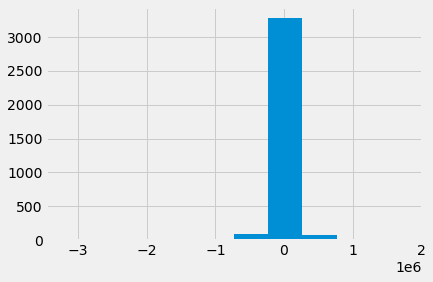

In [74]:
# This checks for the normal distribution of the residuals or error term.  By satisfying this assumption, you are able to generate more reliable confidence and prediction intervals.
plt.hist(residuals)
plt.savefig('images/residuals.png')

<img src='images/residuals.png'>

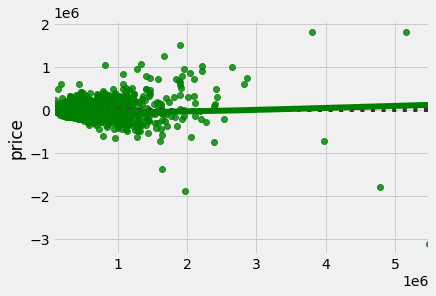

In [75]:
# We use residplot to check for heteroscedasticity, which is the case where the residuals have a non-constant variance
sns.residplot(y_tt_pred, y_test, lowess=True, color='g')
plt.savefig('images/residplot.png')

<img src='images/residplot.png'>

## Feature Selection

There are three types of feature selection methods:  filter, wrapper, and embedded.  Filtering methods, like K-Best, approach the problem by estimating the validities of features through statistical tests (i.e. correlation coefficient, information gain, chi-squared test, f-test) to assign scoring to each feature, which are subsequently ranked and selected.  Here K-Best uses the f-test (`f_regression`) to compare the least square errors between the two models and checks if the difference is significant and returns the top 20 features.

Filtering methods are computationally less expensive than wrapper methods since we are not training an actual model.

In [118]:
# Instantiate SelectKBest object and fit training data where k is the number of features you want to select
X_train, X_test, y_train, y_test = train_test_split(df_model, target, random_state=9, test_size=0.2)
sel = SelectKBest(f_regression, k=20)
sel.fit(X_train, y_train)
sel_columns = X_train.columns[sel.get_support()]
rem_columns = X_train.columns[~sel.get_support()]

In [119]:
list(sel_columns)

# ['sqft_living',
#  'grade',
#  'bathrooms sqft_living',
#  'bathrooms grade',
#  'bathrooms sqft_above',
#  'bathrooms sqft_living15',
#  'sqft_living^2',
#  'sqft_living condition',
#  'sqft_living grade',
#  'sqft_living sqft_above',
#  'sqft_living zipcode',
#  'sqft_living lat',
#  'sqft_living long',
#  'sqft_living sqft_living15',
#  'grade^2',
#  'grade sqft_above',
#  'grade zipcode',
#  'grade lat',
#  'grade long',
#  'grade sqft_living15']

['sqft_living',
 'grade',
 'bathrooms sqft_living',
 'bathrooms grade',
 'bathrooms sqft_above',
 'bathrooms sqft_living15',
 'sqft_living^2',
 'sqft_living condition',
 'sqft_living grade',
 'sqft_living sqft_above',
 'sqft_living zipcode',
 'sqft_living lat',
 'sqft_living long',
 'sqft_living sqft_living15',
 'grade^2',
 'grade sqft_above',
 'grade zipcode',
 'grade lat',
 'grade long',
 'grade sqft_living15']

In [122]:
# Instantiate linear regression object and fit the linear regression to the data
kbest = LinearRegression().fit(X_train[sel_columns], y_train)
y_tr_pred = kbest.predict(X_train[sel_columns])
kb_tr_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_tr_pred))
y_tt_pred = kbest.predict(X_test[sel_columns])
kb_tt_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_tt_pred))

print('Training R^2 Score: ', round(r2_score(y_train, y_tr_pred), 4))
print('Training MAE: ', round(mean_absolute_error(y_train, y_tr_pred), 2))
print('Training MSE: ', "{:.4e}".format(mean_squared_error(y_train, y_tr_pred)))
print('Training RMSE: ', round(np.sqrt(mean_squared_error(y_train, y_tr_pred)), 2))
print('Training Bias: ', round(bias(y_train, y_tr_pred), 2))
print('Training Variance: ', "{:.4e}".format(variance(y_tr_pred)))
print("")
print('Testing R^2 Score: ', round(r2_score(y_test, y_tt_pred), 4))
print('Testing MAE: ', round(mean_absolute_error(y_test, y_tt_pred), 2))
print('Testing MSE: ', "{:.4e}".format(mean_squared_error(y_test, y_tt_pred)))
print('Testing RMSE: ', round(np.sqrt(mean_squared_error(y_test, y_tt_pred)), 2))
print('Testing Bias: ', round(bias(y_test, y_tt_pred), 2))
print('Testing Variance: ', "{:.4e}".format(variance(y_tt_pred)))

Training R^2 Score:  0.7156
Training MAE:  125323.69
Training MSE:  4.0084e+10
Training RMSE:  200210.21
Training Bias:  -0.0
Training Variance:  1.0088e+11

Testing R^2 Score:  0.7315
Testing MAE:  124886.23
Testing MSE:  3.5690e+10
Testing RMSE:  188917.52
Testing Bias:  7885.53
Testing Variance:  1.0134e+11


**Initial thoughts:**

This would indicate that `sqft_living`, `grade`, `bathrooms` are strongly correlated with the `price`.  It would make sense that `grade` and `sqft_living` would also be strongly correlated, but `bathrooms` seem correlated through an interaction feature, but not `bathrooms` alone.  `sqft_above`, `sqft_living15`, `zipcode`, `lat`, `long`, and `condition` only appear through interaction features, but could be worth exploring.

## Second Run

In [ ]:
df2 = df.copy()
df2.drop('sqft_above', axis=1, inplace=True)
df2.drop(['floors', 'condition'], inplace=True, axis=1)
dum_feat2 = df[['bedrooms', 'bathrooms', grade']]
dum_index2 = dum_feat2.columns
df_dum2 = pd.get_dummies(data=dum_feat2, columns=dum_index2, drop_first=True, prefix=['bdr', 'bth', 'grd'])
df2.drop(columns=['bedrooms', 'bathrooms', 'grade'], inplace=True)
target = df2['price']
# Grab columns for polynominal and interaction features from the original dataframe without dummy variables
poly_feat2 = df2[['sale_age', 'sqft_living', 'sqft_living15', 'grade']]
# Use SKlearn to create binomial features
poly = PolynomialFeatures(degree=2, include_bias=False)
poly_data2 = poly.fit_transform(poly_feat2)
poly_columns2 = poly.get_feature_names(poly_feat2.columns)
df_poly2 = pd.DataFrame(poly_data2, columns=poly_columns2)
df_model2 = pd.concat([df_poly2, df_dum2], axis=1)
X = X.drop(columns=['price'], axis=1)


In [90]:
dum_feat2 = df[['bedrooms', 'bathrooms', grade']]
dum_index2 = dum_feat2.columns
df_dum2 = pd.get_dummies(data=dum_feat2, columns=dum_index2, drop_first=True, prefix=['bdr', 'bth', 'grd'])
poly_feat2 = df.drop('price', axis=1)
target = df['price']
poly2 = PolynomialFeatures(degree=2, include_bias=False)
poly_data2 = poly2.fit_transform(poly_feat2)
poly_columns2 = poly2.get_feature_names(poly_feat2.columns)
df_poly2 = pd.DataFrame(poly_data2, columns=poly_columns2)
df_poly2.drop(columns=['bedrooms', 'bathrooms', 'floors', 'condition', 'grade'], inplace=True)
df_model2 = pd.concat([df_poly2, df_dum2], axis=1)

In [94]:
X_tr2, X_tt2, y_tr2, y_tt2 = train_test_split(df_model2, target, random_state=34, test_size=0.2)
scaler = StandardScaler()
scaler.fit(X_tr2)
X_tr2 = pd.DataFrame(data=scaler.transform(X_tr2), columns=df_model2.columns)
X_tt2 = pd.DataFrame(data=scaler.transform(X_tt2), columns=df_model2.columns)

### Ridge and Lasso Regression

Embedded methods learn which features best contribute to the accuracy of the model while the model is being created, the most common being the regularization methods.  They are also called penalization methods that introduce additional constraints into the optimization of a predictive algorithm that bias the model toward lower complexity, i.e. fewer coefficients.

Ridge regression optimizes the RSS by adding a penalty equivalent to the square of the magnitude of the coefficients, while Lasso adds a penalty equivalent to the absolute value of the magnitude of the coefficients.

Optimal Alpha Value: 28


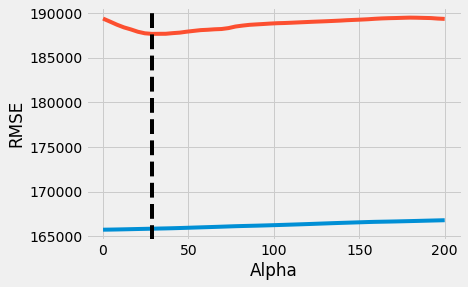

In [111]:
tr_rmse=[]
tt_rmse=[]
alphas=[]
for alpha in np.linspace(0,200, num=50):
    lasso=Lasso(alpha=alpha)
    lasso.fit(X_tr2, y_tr2)
    tr_pred=lasso.predict(X_tr2)
    tr_rmse.append(np.sqrt(mean_squared_error(y_tr2, tr_pred)))
    tt_pred=lasso.predict(X_tt2)
    tt_rmse.append(np.sqrt(mean_squared_error(y_tt2, tt_pred)))
    alphas.append(alpha)

fig,ax=plt.subplots()
ax.plot(alphas, tr_rmse, label="Train")
ax.plot(alphas, tt_rmse, label="Test")
ax.set_xlabel("Alpha")
ax.set_ylabel("RMSE")
optimal_alpha=alphas[np.argmin(tt_rmse)]
ax.axvline(optimal_alpha, color="black", linestyle="--")
print(f'Optimal Alpha Value: {int(optimal_alpha)}')
plt.savefig('images/optimal_lasso.png')

In [112]:
lasso = Lasso(alpha=28, normalize=False)
lasso.fit(X_tr2, y_tr2)
y_tr_pred2 = lasso.predict(X_tr2)
y_tt_pred2 = lasso.predict(X_tt2)

print('Training R^2 Score: ', round(r2_score(y_tr2, y_tr_pred2), 4))
print('Training MAE: ', round(mean_absolute_error(y_tr2, y_tr_pred2), 2))
print('Training MSE: ', "{:.4e}".format(mean_squared_error(y_tr2, y_tr_pred2)))
print('Training RMSE: ', round(np.sqrt(mean_squared_error(y_tr2, y_tr_pred2)), 2))
print('Training Bias: ', round(bias(y_tr2, y_tr_pred2), 2))
print('Training Variance: ', "{:.4e}".format(variance(y_tr_pred2)))
print("")
print('Testing R^2 Score: ', round(r2_score(y_tt2, y_tt_pred2), 4))
print('Testing MAE: ', round(mean_absolute_error(y_tt2, y_tt_pred2), 2))
print('Testing MSE: ', "{:.4e}".format(mean_squared_error(y_tt2, y_tt_pred2)))
print('Testing RMSE: ', round(np.sqrt(mean_squared_error(y_tt2, y_tt_pred2)), 2))
print('Testing Bias: ', round(bias(y_tt2, y_tt_pred2), 2))
print('Testing Variance: ', "{:.4e}".format(variance(y_tt_pred2)))

Training R^2 Score:  0.8014
Training MAE:  105335.47
Training MSE:  2.7506e+10
Training RMSE:  165848.78
Training Bias:  0.0
Training Variance:  1.1073e+11

Testing R^2 Score:  0.7536
Testing MAE:  109534.45
Testing MSE:  3.5212e+10
Testing RMSE:  187649.88
Testing Bias:  -4217.33
Testing Variance:  1.0393e+11


### RFECV

Wrapper algorithms like RFECV returns a best set of features with an extensive greedy search, where different combinations are prepared, evaluated, and compared to other combinations.  Recursive Feature Elimination and Cross-Validation Selection begins with a model with the complete set of predictors and a score is assigned to each predictor, and the least important are removed.  The model is then rebuilt, and importance scores are computed again.  It is usually best practice to identify multicollinearity first, as it will select relevant and redundant features alike. 

In [98]:
lr = LinearRegression()
rfe = RFECV(estimator=lr, step=1, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')
rfe.fit(X_tr2, y_tr2)
selected = X_tr2.columns[rfe.support_]
removed = X_tr2.columns[~rfe.support_]
print("Optimal number of features : %d" % rfe.n_features_)

# Optimal number of features : 59

Optimal number of features : 59


In [101]:
print(list(selected))
len(list(selected))


# ['sqft_living', 'waterfront', 'sqft_above', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15', 'renovated', 'basement', 'bathrooms zipcode', 'bathrooms lat', 'sqft_living zipcode', 'sqft_living lat', 'sqft_living long', 'sqft_living basement', 'sqft_lot zipcode', 'sqft_lot long', 'floors zipcode', 'floors long', 'waterfront^2', 'waterfront zipcode', 'waterfront lat', 'waterfront long', 'waterfront viewed', 'grade^2', 'grade lat', 'grade long', 'sqft_above zipcode', 'sqft_above lat', 'sqft_above basement', 'zipcode^2', 'zipcode lat', 'zipcode long', 'zipcode sqft_living15', 'zipcode sale_age', 'zipcode renovated', 'zipcode basement', 'lat^2', 'lat long', 'lat sqft_lot15', 'lat sale_age', 'lat renovated', 'long^2', 'long sqft_living15', 'long sqft_lot15', 'long sale_age', 'long renovated', 'renovated^2', 'basement^2', 'grd_5', 'grd_6', 'grd_7', 'grd_8', 'grd_9', 'grd_10', 'grd_11', 'grd_12', 'grd_13']
# 59

['sqft_living', 'waterfront', 'sqft_above', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15', 'renovated', 'basement', 'bathrooms zipcode', 'bathrooms lat', 'sqft_living zipcode', 'sqft_living lat', 'sqft_living long', 'sqft_living basement', 'sqft_lot zipcode', 'sqft_lot long', 'floors zipcode', 'floors long', 'waterfront^2', 'waterfront zipcode', 'waterfront lat', 'waterfront long', 'waterfront viewed', 'grade^2', 'grade lat', 'grade long', 'sqft_above zipcode', 'sqft_above lat', 'sqft_above basement', 'zipcode^2', 'zipcode lat', 'zipcode long', 'zipcode sqft_living15', 'zipcode sale_age', 'zipcode renovated', 'zipcode basement', 'lat^2', 'lat long', 'lat sqft_lot15', 'lat sale_age', 'lat renovated', 'long^2', 'long sqft_living15', 'long sqft_lot15', 'long sale_age', 'long renovated', 'renovated^2', 'basement^2', 'grd_5', 'grd_6', 'grd_7', 'grd_8', 'grd_9', 'grd_10', 'grd_11', 'grd_12', 'grd_13']


59

In [106]:
rfecv = LinearRegression().fit(X_tr2[selected], y_tr2)
y_tr_pred_rfe = rfecv.predict(X_tr2[selected])
y_tt_pred_rfe = rfecv.predict(X_tt2[selected])

print('Training R^2 Score: ', round(r2_score(y_tr2, y_tr_pred_rfe), 4))
print('Training MAE: ', round(mean_absolute_error(y_tr2, y_tr_pred_rfe), 2))
print('Training MSE: ', "{:.4e}".format(mean_squared_error(y_tr2, y_tr_pred_rfe)))
print('Training RMSE: ', round(np.sqrt(mean_squared_error(y_tr2, y_tr_pred_rfe)), 2))
print('Training Bias: ', round(bias(y_tr2, y_tr_pred_rfe), 2))
print('Training Variance: ', "{:.4e}".format(variance(y_tr_pred_rfe)))
print("")
print('Testing R^2 Score: ', round(r2_score(y_tt2, y_tt_pred_rfe), 4))
print('Testing MAE: ', round(mean_absolute_error(y_tt2, y_tt_pred_rfe), 2))
print('Testing MSE: ', "{:.4e}".format(mean_squared_error(y_tt2, y_tt_pred_rfe)))
print('Testing RMSE: ', round(np.sqrt(mean_squared_error(y_tt2, y_tt_pred_rfe)), 2))
print('Testing Bias: ', round(bias(y_tt2, y_tt_pred_rfe), 2))
print('Testing Variance: ', "{:.4e}".format(variance(y_tt_pred_rfe)))

Training R^2 Score:  0.7954
Training MAE:  107922.09
Training MSE:  2.8325e+10
Training RMSE:  168300.99
Training Bias:  1.66
Training Variance:  1.1013e+11

Testing R^2 Score:  0.1502
Testing MAE:  118481.37
Testing MSE:  1.2145e+11
Testing RMSE:  348501.96
Testing Bias:  3120.92
Testing Variance:  1.9034e+11


### Decision Tree Regressor

In [123]:
from sklearn.tree import DecisionTreeRegressor
dtm = DecisionTreeRegressor(random_state=42)
dtm.fit(X_tr2, y_tr2)

DecisionTreeRegressor(random_state=42)

In [124]:
y_tr_pred3 = dtm.predict(X_tr2) 
y_tt_pred3 = dtm.predict(X_tt2)

print('Training R^2 Score: ', round(r2_score(y_tr2, y_tr_pred3), 4))
print('Training MAE: ', round(mean_absolute_error(y_tr2, y_tr_pred3), 2))
print('Training MSE: ', "{:.4e}".format(mean_squared_error(y_tr2, y_tr_pred3)))
print('Training RMSE: ', round(np.sqrt(mean_squared_error(y_tr2, y_tr_pred3)), 2))
print('Training Bias: ', round(bias(y_tr2, y_tr_pred3), 2))
print('Training Variance: ', "{:.4e}".format(variance(y_tr_pred3)))
print("")
print('Testing R^2 Score: ', round(r2_score(y_tt2, y_tt_pred3), 4))
print('Testing MAE: ', round(mean_absolute_error(y_tt2, y_tt_pred3), 2))
print('Testing MSE: ', "{:.4e}".format(mean_squared_error(y_tt2, y_tt_pred3)))
print('Testing RMSE: ', round(np.sqrt(mean_squared_error(y_tt2, y_tt_pred3)), 2))
print('Testing Bias: ', round(bias(y_tt2, y_tt_pred3), 2))
print('Testing Variance: ', "{:.4e}".format(variance(y_tt_pred3)))

Training R^2 Score:  1.0
Training MAE:  90.15
Training MSE:  6.2897e+06
Training RMSE:  2507.93
Training Bias:  0.0
Training Variance:  1.3846e+11

Testing R^2 Score:  0.7078
Testing MAE:  101603.72
Testing MSE:  4.1756e+10
Testing RMSE:  204341.7
Testing Bias:  532.71
Testing Variance:  1.5192e+11


In [125]:
dtm = DecisionTreeRegressor()
param_grid = {'criterion': ['mse', 'mae'],
              'n_estimators': [10, 50, 100, 250, 500, 1000],
              'max_depth': [None, 2, 4, 8, 12],
              'max_features': ['auto', 'sqrt', 'log2'],
              'min_samples_split': [0.05, 0.1, 0.25, 0.5],
              'min_samples_leaf': [0.05, 0.1, 0.25, 0.5]
              }
model = GridSearchCV(clf, param_grid=param_grid, cv=5, scoring="accuracy", verbose=1)
model.fit(X_train, y_train)
print(f"Training Accuracy: {model.best_score_ :.2%}")
model.best_estimator_

NameError: name 'GridSearchCV' is not defined

In [116]:
feature_importances = pd.DataFrame(rf.feature_importances_, index=X_tr2.columns, 
                                   columns=['importance']).sort_values('importance', ascending=False)
feature_importances.head(20)

,importance
grade lat,0.458223
grade long,0.148079
sqft_living condition,0.054389
sqft_living grade,0.032083
sqft_living15 sale_age,0.013023
sqft_living sqft_living15,0.012990
lat long,0.011077
zipcode lat,0.010292
lat^2,0.009333
waterfront lat,0.009205


# Third Model

In [ ]:
ss = StandardScaler()
X_train

In [167]:
df3 = df.copy()
df3

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,zipcode,lat,long,sqft_living15,sqft_lot15,sale_age,renovated,basement,viewed
0,365000.0,4,2.25,2070,8893,2.0,0,4,8,2070,98058,47.4388,-122.162,2390,7700,28,0,0,0
1,865000.0,5,3.00,2900,6730,1.0,0,5,8,1830,98115,47.6784,-122.285,2370,6283,37,0,1,0
2,1038000.0,4,2.50,3770,10893,2.0,0,3,11,3770,98006,47.5646,-122.129,3710,9685,17,0,0,1
3,1490000.0,3,3.50,4560,14608,2.0,0,3,12,4560,98034,47.6995,-122.228,4050,14226,25,0,0,1
4,711000.0,3,2.50,2550,5376,2.0,0,3,9,2550,98052,47.6647,-122.083,2250,4050,10,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17285,750000.0,5,2.50,3240,9960,1.0,0,3,8,2020,98008,47.5858,-122.112,2730,10400,57,0,1,1
17286,440000.0,2,1.75,1300,4000,2.0,0,3,7,1300,98105,47.6687,-122.288,1350,4013,66,0,0,0
17287,310000.0,3,1.00,1050,9876,1.0,0,3,7,1050,98028,47.7635,-122.262,1760,9403,61,0,0,0
17288,427500.0,3,1.50,1900,43186,1.5,0,4,7,1300,98038,47.4199,-121.990,2080,108028,43,0,1,0


In [168]:
df3['log_sqft_liv'] = np.log(df3.sqft_living)
df3['log_sqft_liv15'] = np.log(df3.sqft_living15)
df3['log_sqft_lot'] = np.log(df3.sqft_lot)
df3['log_sqft_lot15'] = np.log(df3.sqft_lot15)

In [169]:
df3.drop('sqft_above', axis=1, inplace=True)
df3.drop(['floors', 'condition'], inplace=True, axis=1)

In [ ]:
features = df3[['sqft_above', 'sale_year', ]]
features

In [ ]:
target = df['price']
poly = PolynomialFeatures(degree=2, include_bias=False)
poly_data = poly.fit_transform(features)
poly_columns = poly.get_feature_names(features.columns)
df_poly = pd.DataFrame(poly_data, columns=poly_columns)
df_poly.head()

# Final Model

In [107]:
#instantiate a linear regression object
lm_final = LinearRegression()
#fit the linear regression to the data
lm_final = lm_final.fit(features[selected_columns], target)

KeyError: "['lat price', 'log_sqft_liv^2', 'price bathrooms', 'log_sqft_liv15 price', 'lat grade', 'log_sqft_liv', 'lat log_sqft_liv15', 'lat log_sqft_liv', 'price grade', 'log_sqft_liv bathrooms', 'log_sqft_liv15 grade', 'log_sqft_liv log_sqft_liv15', 'grade bathrooms', 'log_sqft_liv grade', 'price^2', 'log_sqft_liv price'] not in index"

In [79]:
lm_final.coef_

array([-2.36956282e+04,  1.73511005e+04, -1.12617809e+04, -3.78350078e-02,
        1.18160091e-01, -7.48147471e-01,  3.04086466e+02, -6.75290751e+02,
        8.37253482e-02, -9.55613607e-01, -3.29756252e-02,  7.60779907e-02,
        4.51008813e+01,  2.19510615e+02, -1.16575356e-01,  8.71207944e+01,
        4.44540510e-01,  8.44635978e+00,  2.67506561e+02,  2.09351280e-02])

## **Pickle**

In [80]:
pickle_out = open("model.pickle","wb")
pickle.dump(lm_final, pickle_out)
pickle_out.close()

In [83]:
pickle_out = open("scaler.pickle", "wb")
pickle.dump(scaler, pickle_out)
pickle_out.close

<function BufferedWriter.close>

# Prediction with Holdout Set

In [ ]:
# read csv file
df = pd.read_csv('data/kc_house_data_test_features.csv', index_col=0)


In [ ]:
# data preprocessing
df['sale_date'] = [x[:8] for x in df.date]
df.sale_date = df.sale_date.apply(lambda x: datetime.strptime(x, '%Y%m%d'))
df.drop(columns='date', inplace=True)
df.drop(['id'], inplace=True, axis=1)
df.replace({'bedrooms': {33: 3}}, inplace=True)
df.replace({'bedrooms': {11: 1}}, inplace=True)
df['sale_age'] = df.sale_date.dt.year - df[['yr_built', 'yr_renovated']].max(axis=1)
df.replace({'sale_age': {-1: 0}}, inplace=True)
df['renovated'] = df.yr_renovated.apply(lambda x: x if x==0 else 1)
df['basement'] = df.sqft_basement.apply(lambda x: x if x==0 else 1)
df['viewed'] = df.view.apply(lambda x: x if x==0 else 1)
df.drop(['yr_built', 'yr_renovated', 'sale_date', 'sqft_basement', 'view'], inplace=True, axis=1)

In [ ]:
# dummy variables
index_dum = df[['bedrooms', 'bathrooms', 'floors', 'condition', 'grade']].columns
df_dum = pd.get_dummies(data=df, columns=index_dum, drop_first=True, prefix=['bdr', 'bth', 'flr', 'cnd', 'grd'])
# polynomial and interaction features
poly = PolynomialFeatures(degree=2, include_bias=False)
poly_data = poly.fit_transform(df_dum)
poly_columns = poly.get_feature_names(df_dum.columns)
df_poly = pd.DataFrame(poly_data, columns=poly_columns)

In [ ]:
# subset identified by K-Best
features = df_poly[['sqft_living', 'sqft_above', 'sqft_living15', 'sqft_living^2',
       'sqft_living sqft_above', 'sqft_living zipcode', 'sqft_living lat',
       'sqft_living long', 'sqft_living sqft_living15', 'sqft_living viewed',
       'sqft_above^2', 'sqft_above zipcode', 'sqft_above lat',
       'sqft_above long', 'sqft_above sqft_living15', 'sqft_above viewed',
       'zipcode sqft_living15', 'lat sqft_living15', 'long sqft_living15',
       'sqft_living15^2']]

In [ ]:
# Scaling
scaler = StandardScaler()
features = pd.DataFrame(data=scaler.fit_transform(features), columns=features.columns)

In [ ]:
# Load pickle
with open('data/model.pickle', 'rb') as file:
    final_answer = pickle.load(file)
final_answers = final_answer.predict(features)

In [ ]:
# Write prediction to CSV file
pd.DataFrame(final_answers, columns=['predictions']).to_csv('housing_preds_Steven_Yan.csv')